In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import shuffle

In [2]:
train_df = pd.read_csv('sift_train_features.csv')
test_df = pd.read_csv('sift_test_features.csv')

In [3]:
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values  # etiketler string şeklinde, örneğin 'A'
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [4]:
y_train

array(['X', 'P', 'W', ..., 'S', 'U', 'Q'], shape=(187200,), dtype=object)

In [5]:
def train_and_evaluate(model, model_name):
    # Modeli eğit
    model.fit(X_train, y_train)
    # Test verisi üzerinde tahmin yap
    y_pred = model.predict(X_test)
    
    # Accuracy hesapla
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.4f}")
    
    # Karışıklık matrisi hesapla
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    
    # Karışıklık matrisini görselleştir
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

KNN Accuracy: 0.4978


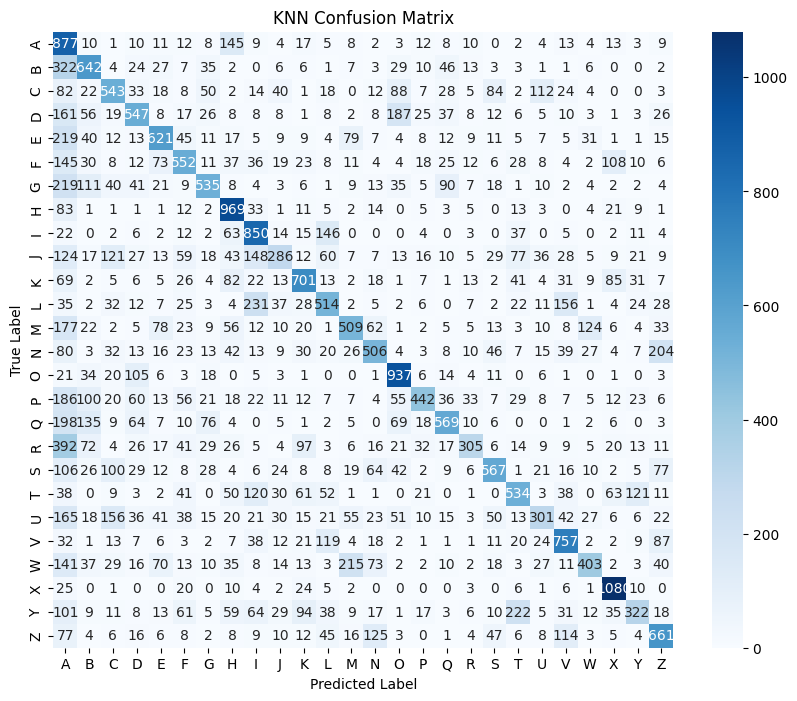

In [6]:
# KNN Modeli
knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn, "KNN")

Naive Bayes Accuracy: 0.4185


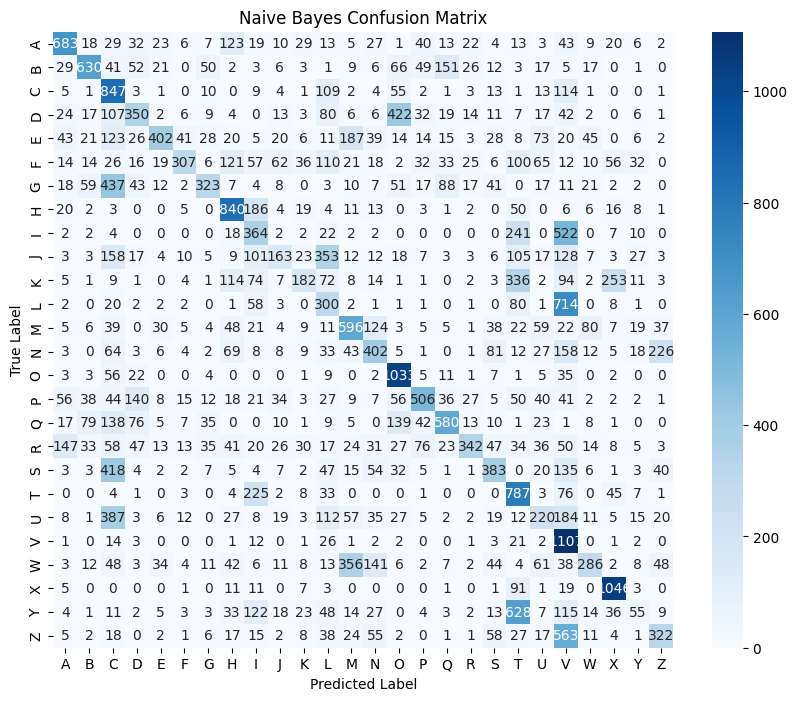

In [7]:
# Naive Bayes Modeli (GaussianNB, SIFT öznitelikleri sürekli veriler içereceği için uygundur)
nb = GaussianNB()
train_and_evaluate(nb, "Naive Bayes")

In [8]:
L = X_train.shape[1]
T = 16
d = L // T
if T * d != L:
    raise ValueError("Öznitelik vektör boyutu, belirlenen T ve d ile uyumlu değil!")

def reshape_sequence(x_flat):
    """
    1D öznitelik vektörünü (length L) (T x d) boyutlu ardışık diziye dönüştürür.
    Burada L = 256, T = 16, d = 16.
    """
    return np.reshape(x_flat, (T, d))

In [9]:
# 3. Eğitim verilerini sınıf bazında grupla: Her sınıfa ait sequence'ler ayrı listede tutulur.
train_data = {}
for i, label in enumerate(y_train):
    seq = reshape_sequence(X_train[i])
    if label in train_data:
        train_data[label].append(seq)
    else:
        train_data[label] = [seq]

In [10]:
# 4. Her Sınıf için Gaussian HMM Eğitimi
hmm_models = {}
n_components = 4  # HMM’deki durum (state) sayısı; deneysel olarak ayarlanabilir.
for label, sequences in train_data.items():
    lengths = [seq.shape[0] for seq in sequences]  # Her sequence'in uzunluğu T (sabit 16)
    X = np.vstack(sequences)  # Tüm örnek dizilerini birleştiriyoruz.
    model = GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=100, random_state=42)
    model.fit(X, lengths)
    hmm_models[label] = model
    print(f"{label} sınıfı için HMM eğitildi, örnek sayısı: {len(sequences)}")

Model is not converging.  Current: 9227155.312843429 is not greater than 9227165.260922981. Delta is -9.94807955250144


X sınıfı için HMM eğitildi, örnek sayısı: 7200
P sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 8979995.991120411 is not greater than 8980007.480994606. Delta is -11.489874195307493


W sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 10104059.551826501 is not greater than 10104062.456741162. Delta is -2.9049146603792906


T sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 9394729.970368361 is not greater than 9394738.645509271. Delta is -8.675140909850597


Z sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 10044806.295399457 is not greater than 10044812.998917446. Delta is -6.703517988324165


J sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 8644899.850303693 is not greater than 8644953.060029507. Delta is -53.20972581394017


H sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 8353267.223293414 is not greater than 8353320.021232133. Delta is -52.7979387184605


B sınıfı için HMM eğitildi, örnek sayısı: 7200
K sınıfı için HMM eğitildi, örnek sayısı: 7200
I sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 8547044.338276526 is not greater than 8547044.381614229. Delta is -0.04333770275115967


S sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 10449521.460407924 is not greater than 10449566.908325532. Delta is -45.44791760854423


L sınıfı için HMM eğitildi, örnek sayısı: 7200
D sınıfı için HMM eğitildi, örnek sayısı: 7200
E sınıfı için HMM eğitildi, örnek sayısı: 7200
Y sınıfı için HMM eğitildi, örnek sayısı: 7200
Q sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 8339680.699025739 is not greater than 8339716.119835823. Delta is -35.42081008385867


A sınıfı için HMM eğitildi, örnek sayısı: 7200
M sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 9017471.544773921 is not greater than 9017475.289001359. Delta is -3.74422743730247


F sınıfı için HMM eğitildi, örnek sayısı: 7200
G sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 9406455.664692672 is not greater than 9406479.056624629. Delta is -23.391931956633925


O sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 9814274.03800376 is not greater than 9814287.329280403. Delta is -13.291276643052697


V sınıfı için HMM eğitildi, örnek sayısı: 7200
R sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 8950882.480679123 is not greater than 8950908.51445292. Delta is -26.033773796632886


U sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 9871940.423569985 is not greater than 9871940.501194669. Delta is -0.07762468419969082


N sınıfı için HMM eğitildi, örnek sayısı: 7200
C sınıfı için HMM eğitildi, örnek sayısı: 7200


In [11]:
# 5. Test Verisini Sequence Formatına Çevirme
X_test_sequences = [reshape_sequence(x) for x in X_test]

In [12]:
# 6. Test Aşaması: Her Test Sequence'i için Tahmin Yapma
y_pred = []
for seq in X_test_sequences:
    best_label = None
    best_score = -np.inf
    for label, model in hmm_models.items():
        try:
            score = model.score(seq)
            if score > best_score:
                best_score = score
                best_label = label
        except Exception as e:
            continue
    y_pred.append(best_label)

HMM Tabanlı Model Genel Doğruluk: 0.0735


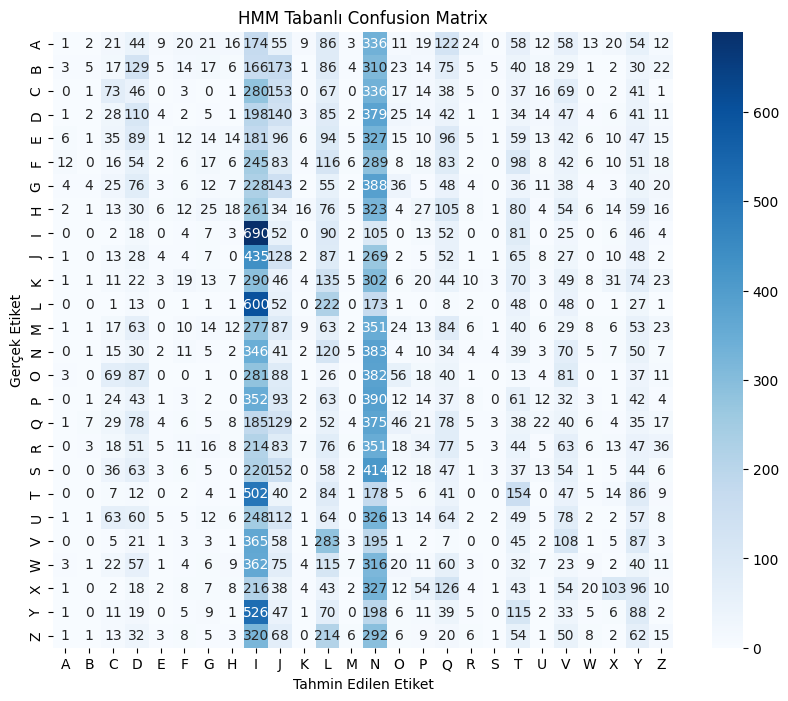

In [13]:
# 7. Performans Değerlendirmesi: Accuracy ve Confusion Matrix Hesaplama
acc = accuracy_score(y_test, y_pred)
print(f"HMM Tabanlı Model Genel Doğruluk: {acc:.4f}")

# Eğitilmiş modellerin anahtarlarını sıralı olarak alalım
labels = sorted(hmm_models.keys())
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("HMM Tabanlı Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()

In [14]:
train_df = pd.read_csv('sift_128_train_features.csv')
test_df = pd.read_csv('sift_128_test_features.csv')

In [15]:
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values  # etiketler string şeklinde, örneğin 'A'
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

KNN Accuracy: 0.4956


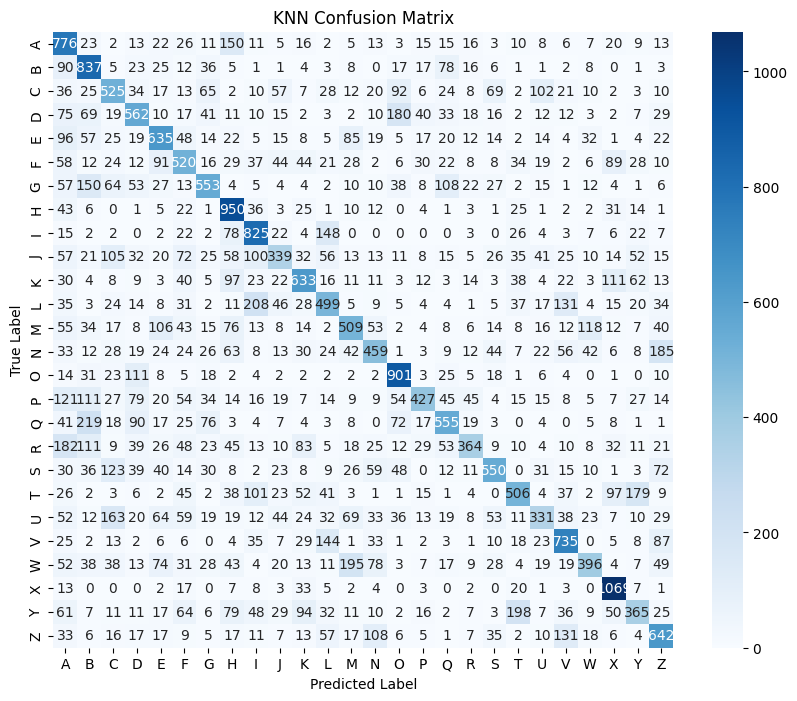

In [16]:
# KNN Modeli
knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn, "KNN")

Naive Bayes Accuracy: 0.3862


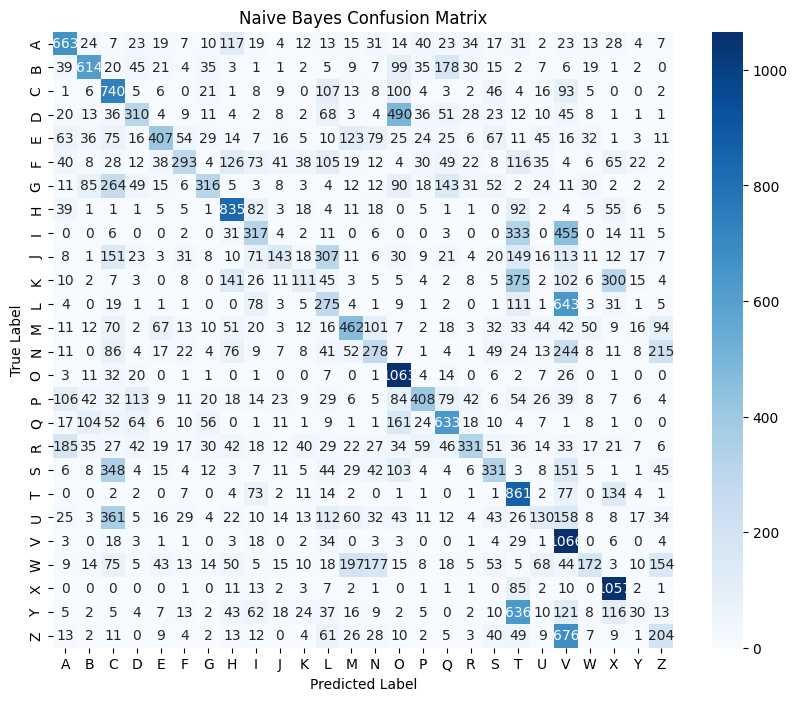

In [17]:
# Naive Bayes Modeli (GaussianNB, SIFT öznitelikleri sürekli veriler içereceği için uygundur)
nb = GaussianNB()
train_and_evaluate(nb, "Naive Bayes")

In [18]:
L = X_train.shape[1]
T = 16
d = L // T
if T * d != L:
    raise ValueError("Öznitelik vektör boyutu, belirlenen T ve d ile uyumlu değil!")

def reshape_sequence(x_flat):
    return np.reshape(x_flat, (T, d))

In [19]:
# 3. Eğitim verilerini sınıf bazında grupla: Her sınıfa ait sequence'ler ayrı listede tutulur.
train_data = {}
for i, label in enumerate(y_train):
    seq = reshape_sequence(X_train[i])
    if label in train_data:
        train_data[label].append(seq)
    else:
        train_data[label] = [seq]

In [20]:
# 4. Her Sınıf için Gaussian HMM Eğitimi
hmm_models = {}
n_components = 4  # HMM’deki durum (state) sayısı; deneysel olarak ayarlanabilir.
for label, sequences in train_data.items():
    lengths = [seq.shape[0] for seq in sequences]  # Her sequence'in uzunluğu T (sabit 16)
    X = np.vstack(sequences)  # Tüm örnek dizilerini birleştiriyoruz.
    model = GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=100, random_state=42)
    model.fit(X, lengths)
    hmm_models[label] = model
    print(f"{label} sınıfı için HMM eğitildi, örnek sayısı: {len(sequences)}")

X sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 4681892.676172126 is not greater than 4681895.780062149. Delta is -3.1038900231942534


P sınıfı için HMM eğitildi, örnek sayısı: 7200
W sınıfı için HMM eğitildi, örnek sayısı: 7200
T sınıfı için HMM eğitildi, örnek sayısı: 7200
Z sınıfı için HMM eğitildi, örnek sayısı: 7200
J sınıfı için HMM eğitildi, örnek sayısı: 7200
H sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 4219394.244105353 is not greater than 4219394.596623019. Delta is -0.3525176662951708


B sınıfı için HMM eğitildi, örnek sayısı: 7200
K sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 4952730.8451729445 is not greater than 4952799.486535992. Delta is -68.64136304706335


I sınıfı için HMM eğitildi, örnek sayısı: 7200
S sınıfı için HMM eğitildi, örnek sayısı: 7200
L sınıfı için HMM eğitildi, örnek sayısı: 7200
D sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 4472770.733344182 is not greater than 4472770.979786682. Delta is -0.24644249957054853


E sınıfı için HMM eğitildi, örnek sayısı: 7200
Y sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 4242309.801142309 is not greater than 4242309.801172193. Delta is -2.9884278774261475e-05


Q sınıfı için HMM eğitildi, örnek sayısı: 7200
A sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 4000320.6794655635 is not greater than 4000343.677420565. Delta is -22.997955001424998


M sınıfı için HMM eğitildi, örnek sayısı: 7200
F sınıfı için HMM eğitildi, örnek sayısı: 7200
G sınıfı için HMM eğitildi, örnek sayısı: 7200
O sınıfı için HMM eğitildi, örnek sayısı: 7200
V sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 4069017.96397001 is not greater than 4069017.9724924657. Delta is -0.00852245558053255


R sınıfı için HMM eğitildi, örnek sayısı: 7200
U sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 4329288.443631654 is not greater than 4329304.389500735. Delta is -15.945869081653655


N sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 4433773.53917259 is not greater than 4433821.217669094. Delta is -47.678496504202485


C sınıfı için HMM eğitildi, örnek sayısı: 7200


In [21]:
# 5. Test Verisini Sequence Formatına Çevirme
X_test_sequences = [reshape_sequence(x) for x in X_test]

In [22]:
# 6. Test Aşaması: Her Test Sequence'i için Tahmin Yapma
y_pred = []
for seq in X_test_sequences:
    best_label = None
    best_score = -np.inf
    for label, model in hmm_models.items():
        try:
            score = model.score(seq)
            if score > best_score:
                best_score = score
                best_label = label
        except Exception as e:
            continue
    y_pred.append(best_label)

HMM Tabanlı Model Genel Doğruluk: 0.0708


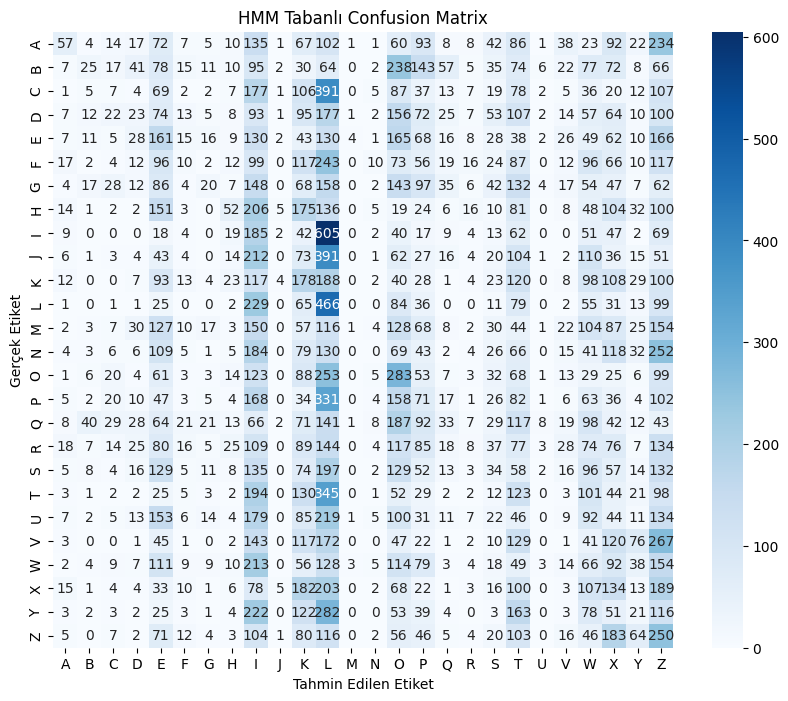

In [23]:
# 7. Performans Değerlendirmesi: Accuracy ve Confusion Matrix Hesaplama
acc = accuracy_score(y_test, y_pred)
print(f"HMM Tabanlı Model Genel Doğruluk: {acc:.4f}")

# Eğitilmiş modellerin anahtarlarını sıralı olarak alalım
labels = sorted(hmm_models.keys())
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("HMM Tabanlı Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()

In [24]:
train_df = pd.read_csv('sift_512_train_features.csv')
test_df = pd.read_csv('sift_512_test_features.csv')

In [25]:
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values  # etiketler string şeklinde, örneğin 'A'
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

KNN Accuracy: 0.4450


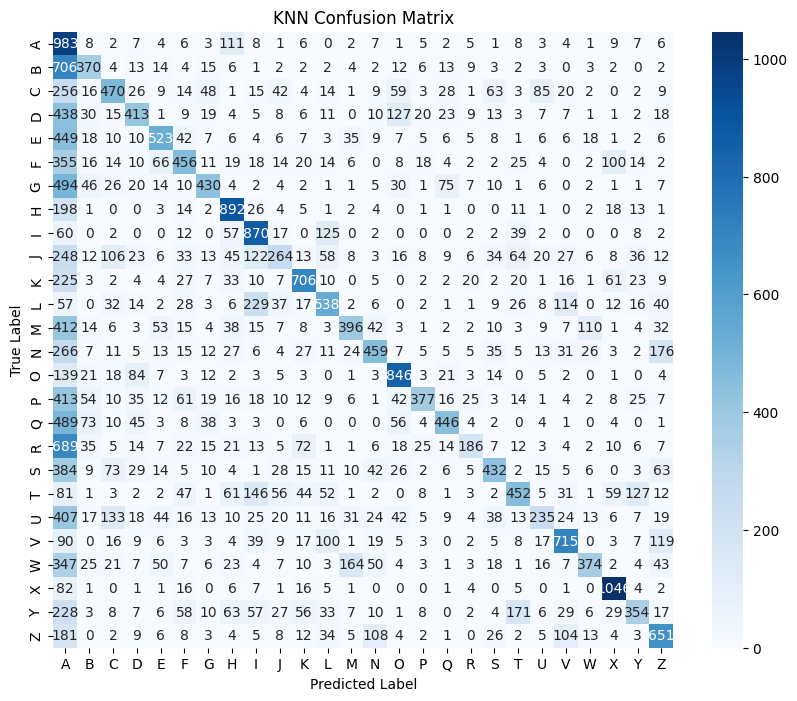

In [26]:
# KNN Modeli
knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn, "KNN")

Naive Bayes Accuracy: 0.4535


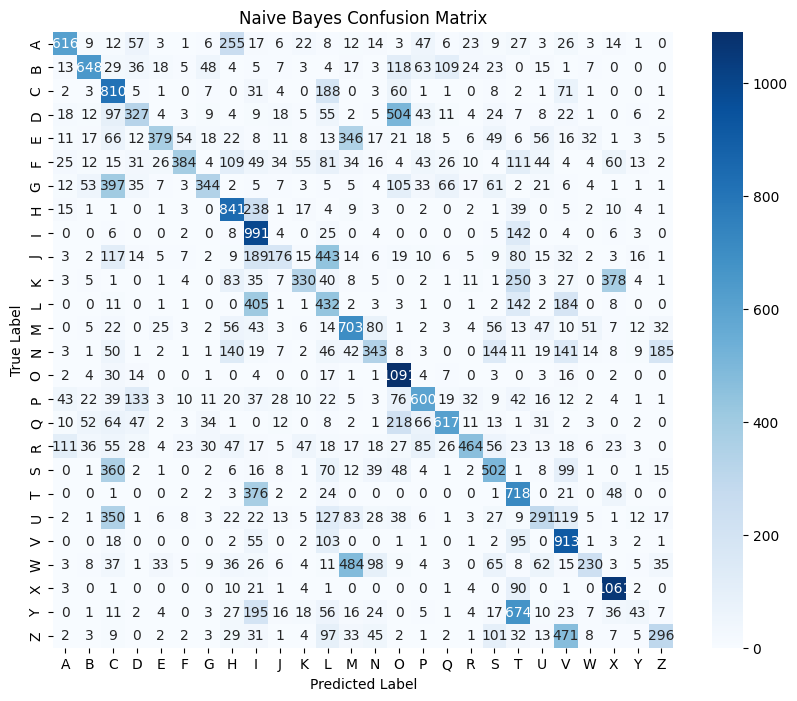

In [27]:
# Naive Bayes Modeli (GaussianNB, SIFT öznitelikleri sürekli veriler içereceği için uygundur)
nb = GaussianNB()
train_and_evaluate(nb, "Naive Bayes")

In [28]:
L = X_train.shape[1]
T = 16
d = L // T
if T * d != L:
    raise ValueError("Öznitelik vektör boyutu, belirlenen T ve d ile uyumlu değil!")

def reshape_sequence(x_flat):
    return np.reshape(x_flat, (T, d))

In [29]:
# 3. Eğitim verilerini sınıf bazında grupla: Her sınıfa ait sequence'ler ayrı listede tutulur.
train_data = {}
for i, label in enumerate(y_train):
    seq = reshape_sequence(X_train[i])
    if label in train_data:
        train_data[label].append(seq)
    else:
        train_data[label] = [seq]

In [30]:
# 4. Her Sınıf için Gaussian HMM Eğitimi
hmm_models = {}
n_components = 4  # HMM’deki durum (state) sayısı; deneysel olarak ayarlanabilir.
for label, sequences in train_data.items():
    lengths = [seq.shape[0] for seq in sequences]  # Her sequence'in uzunluğu T (sabit 16)
    X = np.vstack(sequences)  # Tüm örnek dizilerini birleştiriyoruz.
    model = GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=100, random_state=42)
    model.fit(X, lengths)
    hmm_models[label] = model
    print(f"{label} sınıfı için HMM eğitildi, örnek sayısı: {len(sequences)}")

X sınıfı için HMM eğitildi, örnek sayısı: 7200
P sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 18584496.99467158 is not greater than 18585218.235637806. Delta is -721.2409662269056


W sınıfı için HMM eğitildi, örnek sayısı: 7200
T sınıfı için HMM eğitildi, örnek sayısı: 7200
Z sınıfı için HMM eğitildi, örnek sayısı: 7200
J sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 18342896.04936473 is not greater than 18342901.714596096. Delta is -5.665231365710497


H sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 17835552.941286862 is not greater than 17835556.58165279. Delta is -3.6403659284114838


B sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 19147267.8481366 is not greater than 19147272.800744332. Delta is -4.952607732266188


K sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 20409313.59646721 is not greater than 20409330.469333224. Delta is -16.87286601215601


I sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 18742731.48440369 is not greater than 18742736.094811566. Delta is -4.610407877713442


S sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 21313598.99097492 is not greater than 21313599.003144685. Delta is -0.012169763445854187


L sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 18107251.497547265 is not greater than 18107389.83873055. Delta is -138.34118328616023


D sınıfı için HMM eğitildi, örnek sayısı: 7200
E sınıfı için HMM eğitildi, örnek sayısı: 7200
Y sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 18304738.69124894 is not greater than 18304739.805141117. Delta is -1.1138921789824963


Q sınıfı için HMM eğitildi, örnek sayısı: 7200
A sınıfı için HMM eğitildi, örnek sayısı: 7200
M sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 18290955.311763596 is not greater than 18291088.95136983. Delta is -133.6396062336862


F sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 18876908.87912493 is not greater than 18876945.116989076. Delta is -36.23786414787173


G sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 19440134.970454734 is not greater than 19440139.392797478. Delta is -4.422342743724585


O sınıfı için HMM eğitildi, örnek sayısı: 7200
V sınıfı için HMM eğitildi, örnek sayısı: 7200
R sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 19217706.61050811 is not greater than 19217706.738833264. Delta is -0.12832515314221382


U sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 18447717.31498954 is not greater than 18447717.343333896. Delta is -0.028344355523586273


N sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 19763267.940439414 is not greater than 19763268.37777437. Delta is -0.43733495473861694


C sınıfı için HMM eğitildi, örnek sayısı: 7200


In [31]:
# 5. Test Verisini Sequence Formatına Çevirme
X_test_sequences = [reshape_sequence(x) for x in X_test]

In [32]:
# 6. Test Aşaması: Her Test Sequence'i için Tahmin Yapma
y_pred = []
for seq in X_test_sequences:
    best_label = None
    best_score = -np.inf
    for label, model in hmm_models.items():
        try:
            score = model.score(seq)
            if score > best_score:
                best_score = score
                best_label = label
        except Exception as e:
            continue
    y_pred.append(best_label)

HMM Tabanlı Model Genel Doğruluk: 0.0804


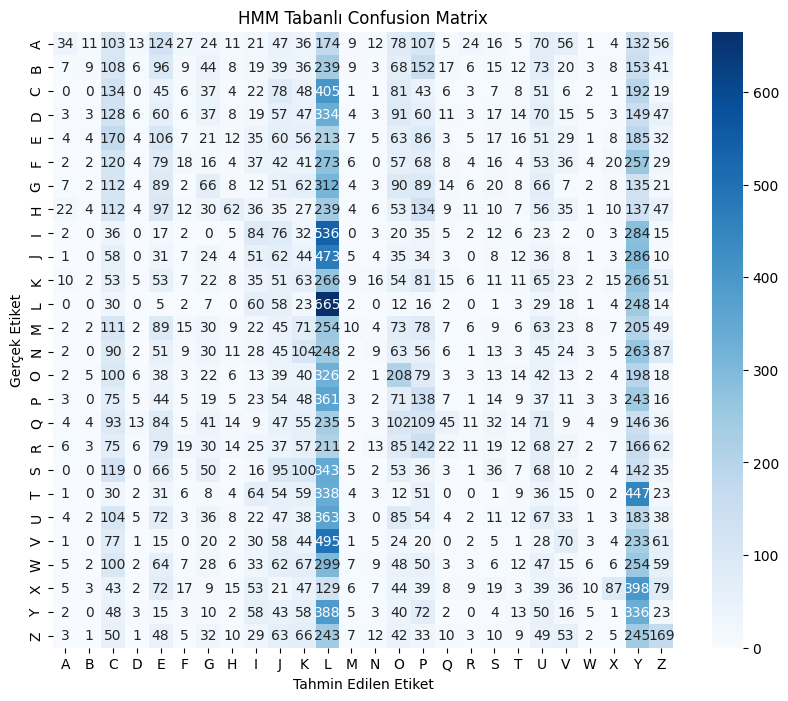

In [33]:
# 7. Performans Değerlendirmesi: Accuracy ve Confusion Matrix Hesaplama
acc = accuracy_score(y_test, y_pred)
print(f"HMM Tabanlı Model Genel Doğruluk: {acc:.4f}")

# Eğitilmiş modellerin anahtarlarını sıralı olarak alalım
labels = sorted(hmm_models.keys())
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("HMM Tabanlı Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()

In [34]:
train_df = pd.read_csv('hog_train_features.csv')
test_df = pd.read_csv('hog_test_features.csv')

In [35]:
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values  # etiketler string şeklinde, örneğin 'A'
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

KNN Accuracy: 0.9126


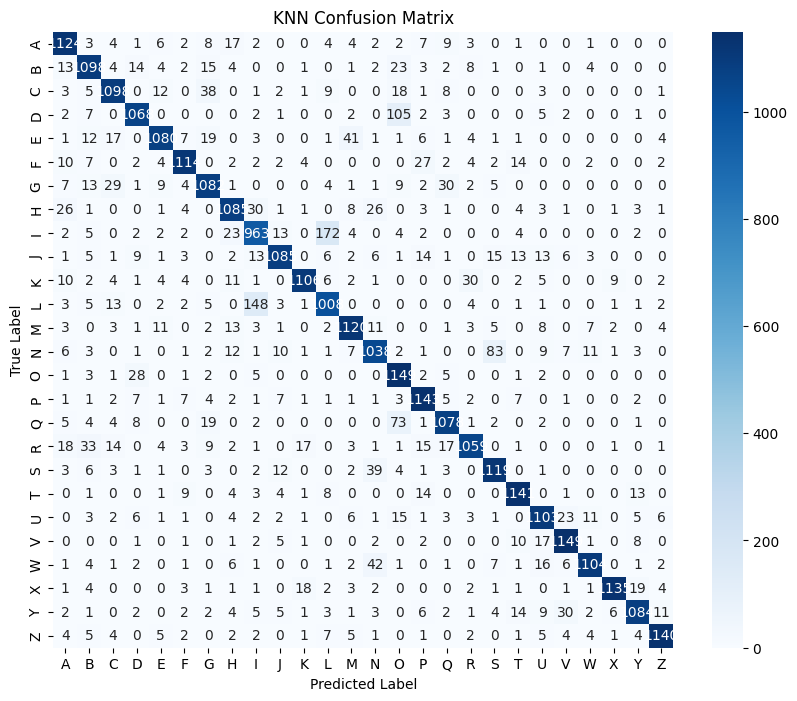

In [36]:
# KNN Modeli
knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn, "KNN")

Naive Bayes Accuracy: 0.6367


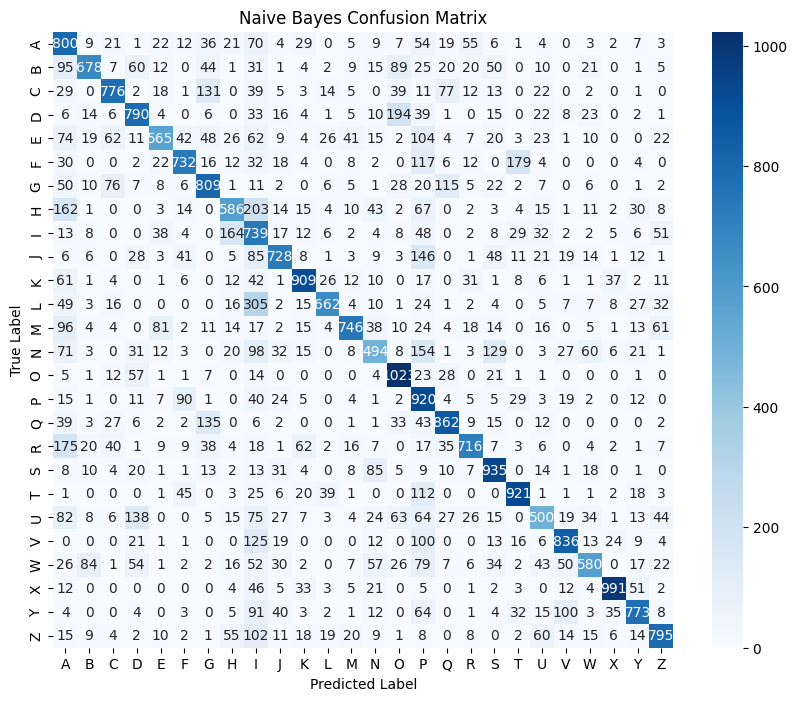

In [37]:
# Naive Bayes Modeli (GaussianNB, SIFT öznitelikleri sürekli veriler içereceği için uygundur)
nb = GaussianNB()
train_and_evaluate(nb, "Naive Bayes")

In [38]:
L = X_train.shape[1]
T = 18
d = L // T
if T * d != L:
    raise ValueError("Öznitelik vektör boyutu, belirlenen T ve d ile uyumlu değil!")

def reshape_sequence(x_flat):
    return np.reshape(x_flat, (T, d))

In [39]:
# 3. Eğitim verilerini sınıf bazında grupla: Her sınıfa ait sequence'ler ayrı listede tutulur.
train_data = {}
for i, label in enumerate(y_train):
    seq = reshape_sequence(X_train[i])
    if label in train_data:
        train_data[label].append(seq)
    else:
        train_data[label] = [seq]

In [40]:
# 4. Her Sınıf için Gaussian HMM Eğitimi
hmm_models = {}
n_components = 4  # HMM’deki durum (state) sayısı; deneysel olarak ayarlanabilir.
for label, sequences in train_data.items():
    lengths = [seq.shape[0] for seq in sequences]  # Her sequence'in uzunluğu T (sabit 16)
    X = np.vstack(sequences)  # Tüm örnek dizilerini birleştiriyoruz.
    model = GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=100, random_state=42)
    model.fit(X, lengths)
    hmm_models[label] = model
    print(f"{label} sınıfı için HMM eğitildi, örnek sayısı: {len(sequences)}")

X sınıfı için HMM eğitildi, örnek sayısı: 7200
P sınıfı için HMM eğitildi, örnek sayısı: 7200
W sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 3051222.5680196467 is not greater than 3051224.061698194. Delta is -1.4936785474419594


T sınıfı için HMM eğitildi, örnek sayısı: 7200
Z sınıfı için HMM eğitildi, örnek sayısı: 7200
J sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 2674043.4977036137 is not greater than 2674043.5572639923. Delta is -0.059560378547757864


H sınıfı için HMM eğitildi, örnek sayısı: 7200
B sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 2446078.9889628487 is not greater than 2446078.9974241154. Delta is -0.00846126675605774


K sınıfı için HMM eğitildi, örnek sayısı: 7200
I sınıfı için HMM eğitildi, örnek sayısı: 7200
S sınıfı için HMM eğitildi, örnek sayısı: 7200
L sınıfı için HMM eğitildi, örnek sayısı: 7200
D sınıfı için HMM eğitildi, örnek sayısı: 7200
E sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 3480872.7785612494 is not greater than 3480872.7786177313. Delta is -5.6481920182704926e-05


Y sınıfı için HMM eğitildi, örnek sayısı: 7200
Q sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 2971824.7090765727 is not greater than 2971824.7382229427. Delta is -0.029146370012313128


A sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 2954044.9755138536 is not greater than 2954045.0461565857. Delta is -0.07064273208379745


M sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 2826616.676048132 is not greater than 2826616.8813109705. Delta is -0.20526283839717507


F sınıfı için HMM eğitildi, örnek sayısı: 7200
G sınıfı için HMM eğitildi, örnek sayısı: 7200
O sınıfı için HMM eğitildi, örnek sayısı: 7200
V sınıfı için HMM eğitildi, örnek sayısı: 7200
R sınıfı için HMM eğitildi, örnek sayısı: 7200


Model is not converging.  Current: 2516797.002402324 is not greater than 2516797.02659928. Delta is -0.02419695584103465


U sınıfı için HMM eğitildi, örnek sayısı: 7200
N sınıfı için HMM eğitildi, örnek sayısı: 7200
C sınıfı için HMM eğitildi, örnek sayısı: 7200


In [41]:
# 5. Test Verisini Sequence Formatına Çevirme
X_test_sequences = [reshape_sequence(x) for x in X_test]

In [42]:
# 6. Test Aşaması: Her Test Sequence'i için Tahmin Yapma
y_pred = []
for seq in X_test_sequences:
    best_label = None
    best_score = -np.inf
    for label, model in hmm_models.items():
        try:
            score = model.score(seq)
            if score > best_score:
                best_score = score
                best_label = label
        except Exception as e:
            continue
    y_pred.append(best_label)

HMM Tabanlı Model Genel Doğruluk: 0.2792


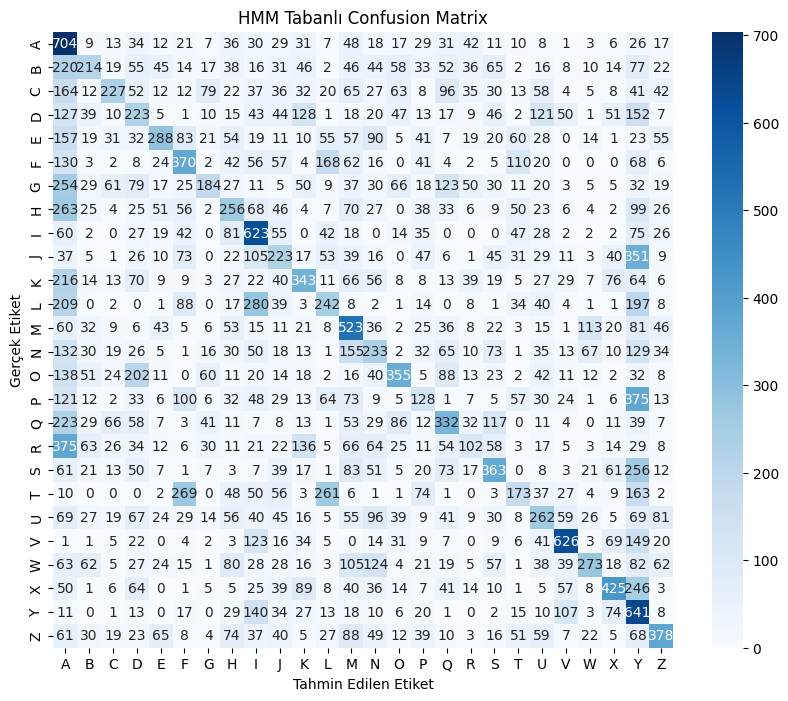

In [43]:
# 7. Performans Değerlendirmesi: Accuracy ve Confusion Matrix Hesaplama
acc = accuracy_score(y_test, y_pred)
print(f"HMM Tabanlı Model Genel Doğruluk: {acc:.4f}")

# Eğitilmiş modellerin anahtarlarını sıralı olarak alalım
labels = sorted(hmm_models.keys())
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("HMM Tabanlı Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()